In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
customers = pd.read_csv('Ecommerce Customers')

In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


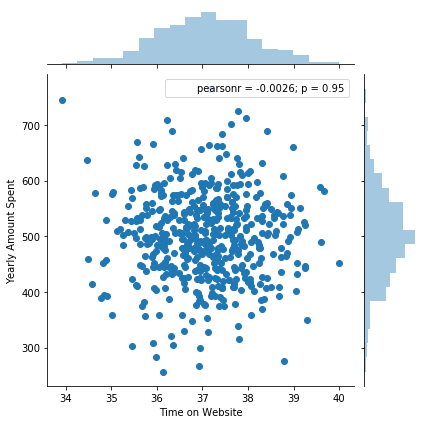

In [9]:
sns.jointplot(customers['Time on Website'],customers['Yearly Amount Spent'])

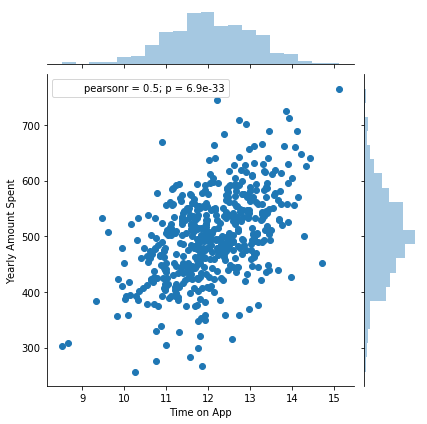

In [10]:
sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'])

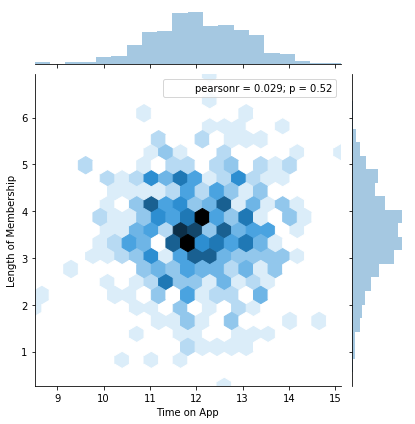

In [11]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

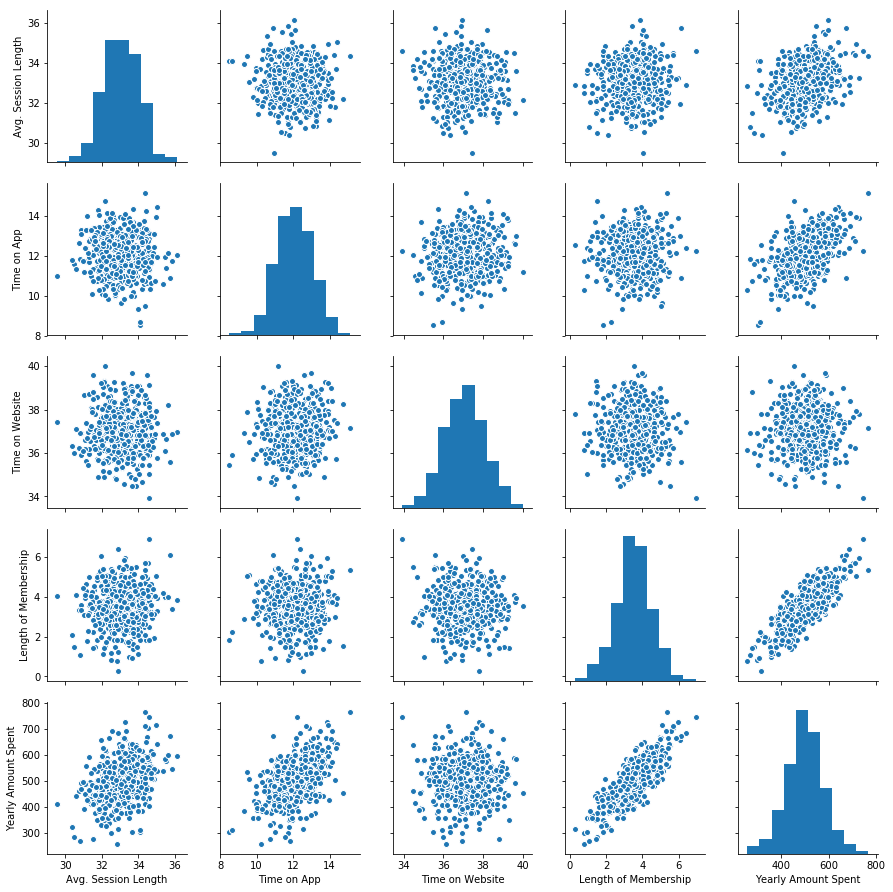

In [12]:
sns.pairplot(customers)

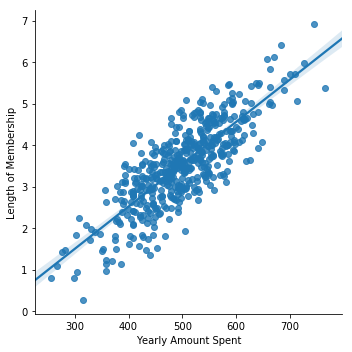

In [13]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers)

In [14]:
customers.columns
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
lm=LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
lm.coef_

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

In [22]:
predict=lm.predict(X_test)

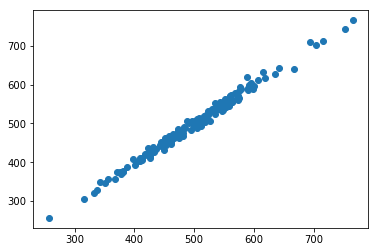

In [23]:
plt.scatter(predict,y_test)

In [24]:
from sklearn import metrics

In [25]:
metrics.mean_absolute_error(y_test,predict)

7.2281486534308552

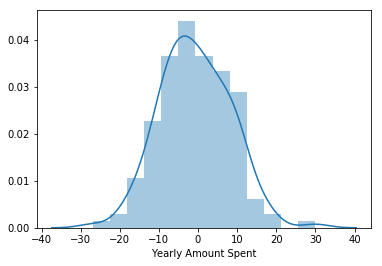

In [26]:
sns.distplot((y_test-predict))

In [27]:
coefficients = pd.DataFrame(lm.coef_,X.columns,columns=['Coeffecients'])
coefficients

,Coeffecients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [28]:
metrics.explained_variance_score(y_test,predict)

0.98907712318896068